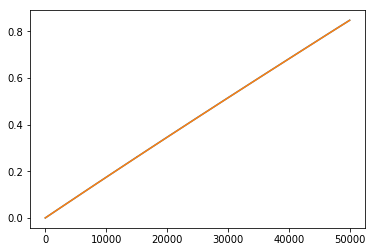

In [26]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\SQUID\\18 April 2019_M(B)"



# mass of the sample in g
#mass = float(input('enter the mass of the sample in mg: '))*10**(-3)
mass = 53.96*10**(-3)

# molar masses of selected elements in g/mol
Na = 22.98976928
Cu = 63.546
Fe = 55.845
V = 50.9415
O = 15.999
Li = 6.941

# MOLECULAR MASS OF THE COMPOUND
molarmass = Li+Cu+2*Fe+3*(V+4*O)

# Bohr magneton in erg/G
muB = 9.274009994e-21

# Avogadro number
NA = 6.02214076e23 #per mol


def line (x, m, c):
    return m*x + c

filename = folder + '\\LiCuFe2VO43_18041019_MB_10K.dc.dat'
#temp = '4 K'

#B, mu, a, b = data_import(filename, 3)
field, temp, m, dm = data_import(filename, 1)
m = m / mass * molarmass / muB / NA

B = (field[::2]+field[1::2])/2
T = (temp[::2]+temp[1::2])/2
mu = (m[::2]+m[1::2])/2

temp = str(np.round(np.mean(T)))+' K'

index = np.arange(len(B))[abs(B-50000)<0.001][-1]
Bup = B[:index]
mup = mu[:index]
Bdown = B[index:]
mdown = mu[index:]

plt.plot(Bup, mup)
plt.plot(Bdown, mdown)

In [15]:
Bup

array([    0.    ,   250.    ,   500.    ,   750.    ,   999.9999,
        1250.    ,  1500.    ,  1750.    ,  2000.    ,  2250.    ,
        2500.    ,  2750.    ,  3000.    ,  3250.    ,  3500.    ,
        3750.    ,  4000.    ,  4250.    ,  4500.    ,  4750.    ,
        5000.    ,  5250.    ,  5500.    ,  5750.    ,  6000.    ,
        6250.    ,  6500.    ,  6750.    ,  7000.    ,  7250.    ,
        7500.    ,  7750.    ,  8000.    ,  8250.    ,  8500.    ,
        8750.    ,  9000.    ,  9250.    ,  9500.    ,  9750.    ,
       10000.    , 10250.    , 10500.    , 10750.    , 11000.    ,
       11250.    , 11500.    , 11750.    , 12000.    , 12250.    ,
       12500.    , 12750.    , 13000.    , 13250.    , 13500.    ,
       13750.    , 14000.    , 14250.    , 14500.    , 14750.    ,
       15000.    , 15000.    , 16944.45  , 18888.89  , 20833.33  ,
       22777.78  , 24722.22  , 26666.67  , 28611.11  , 30555.55  ,
       32500.    , 34444.45  , 36388.89  , 38333.33  , 40277.7

In [27]:
indexup = np.arange(len(Bup))[abs(Bup-15000)<0.01][0]
Bupnew = np.zeros(len(Bup)-1)
mupnew = np.zeros(len(Bup)-1)

Bupnew[:indexup] = Bup[:indexup]
Bupnew[indexup] = ( Bup[indexup] + Bup[indexup+1] ) / 2
Bupnew[indexup+1:] = Bup[indexup+2:]
mupnew[:indexup] = mup[:indexup]
mupnew[indexup] = ( mup[indexup] + mup[indexup+1] ) / 2
mupnew[indexup+1:] = mup[indexup+2:]


indexdown = np.arange(len(Bdown))[abs(Bdown-10000)<0.01][0]
Bdownnew = np.zeros(len(Bdown)-1)
mdownnew = np.zeros(len(Bdown)-1)

Bdownnew[:indexdown] = Bdown[:indexdown]
Bdownnew[indexdown] = ( Bdown[indexdown] + Bdown[indexdown+1] ) / 2
Bdownnew[indexdown+1:] = Bdown[indexdown+2:]
mdownnew[:indexdown] = mdown[:indexdown]
mdownnew[indexdown] = ( mdown[indexdown] + mdown[indexdown+1] ) / 2
mdownnew[indexdown+1:] = mdown[indexdown+2:]


Bup = Bupnew
mup = mupnew
Bdown = Bdownnew
mdown = mdownnew

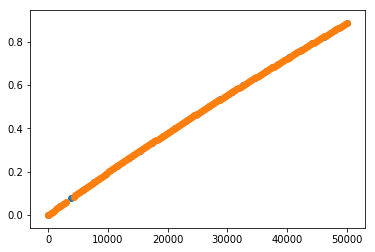

In [33]:
# for 2 K

popt, pcov = curve_fit(line, Bup, mup)
fit = line(Bup, popt[0], popt[1])

deviations = abs(mup-fit)
mean = np.mean(abs(mup-fit))
var = np.std(deviations)

indices = np.arange(len(fit))[abs(deviations-mean) > 4*var]

bup  = np.zeros(len(Bup)-len(indices))
bup[:indices[0]] = Bup[:indices[0]]
bup[indices[0]:] = Bup[indices[-1]+1:]

Mup  = np.zeros(len(Bup)-len(indices))
Mup[:indices[0]] = mup[:indices[0]]
Mup[indices[0]:] = mup[indices[-1]+1:]

mup = Mup
Bup = bup

plt.scatter(Bdown, mdown)
plt.scatter(Bup, mup)

In [ ]:
# for 5 K
mup = mup[Bup<46000]
Bup = Bup[Bup<46000]


popt, pcov = curve_fit(line, Bdown, mdown)
fit = line(Bdown, popt[0], popt[1])

deviations = abs(mdown-fit)
mean = np.mean(abs(mdown-fit))
var = np.std(deviations)

indices = np.arange(len(fit))[abs(deviations-mean) > 1.5*var]

bdown  = np.zeros(len(Bdown)-len(indices))
bdown[:indices[0]] = Bdown[:indices[0]]
bdown[indices[0]:] = Bdown[indices[-1]+1:]

Mdown = np.zeros(len(Bdown)-len(indices))
Mdown[:indices[0]] = mdown[:indices[0]]
Mdown[indices[0]:] = mdown[indices[-1]+1:]

mdown = Mdown
Bdown = bdown

plt.plot(Bdown, mdown)
plt.plot(Bup, mup)

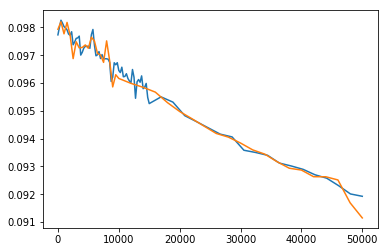

In [28]:
derup = np.gradient(mup, Bup) * muB * NA
derdown = np.gradient(mdown, Bdown) * muB * NA

plt.plot(Bup, derup)
plt.plot(Bdown, derdown)
#plt.scatter(Bup[:70], np.gradient(Bup, subtracted_up)[:70] + np.gradient(Bup, mup)[50] - np.gradient(Bup, subtracted_up)[50])
#plt.ylim([55000, 60000])

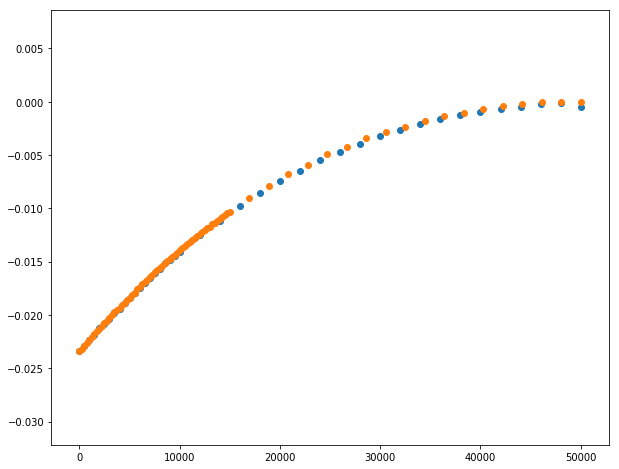

In [29]:
lower_limit = 45000
upper_limit = 50000
mask = [np.all([i>=lower_limit, i<=upper_limit]) for i in Bup]

popt, pcov = curve_fit (line, Bup[mask], mup[mask])

fit_up = line(Bup, popt[0], popt[1])
subtracted_up = mup - fit_up

fit_down = line(Bdown, popt[0], popt[1])
subtracted_down = mdown - fit_down


plt.figure(figsize = (10,8))
plt.scatter(Bdown, subtracted_down)
plt.scatter(Bup, subtracted_up)

In [30]:
i = len(Bup)
a = [np.nan for i in np.zeros(2*i - len(B) + 2)]

derdown = [i for i in derdown] + a
Bdown = [i for i in Bdown] + a
mdown = [i for i in mdown] + a
subtracted_down = [i for i in subtracted_down] + a
fit_down = [i for i in fit_down] + a



data = [Bup, mup, derup, subtracted_up, fit_up, Bdown, mdown, derdown, subtracted_down, fit_down]
names = ['B u', 'M u', 'dM/dB u', 'M - straight line u', 'fitted reference line u',
         'B d', 'M d', 'dM/dB d', 'M - straight line d', 'fitted reference line d']
units = ['T', 'mu_B/f.u.', 'mu_B/(f.u. T)', 'mu_B/f.u.', 'mu_B/f.u.', 
         'T', 'mu_B/f.u.', 'mu_B/(f.u. T)', 'mu_B/f.u.', 'mu_B/f.u.']
comments = [temp, temp, temp, temp, temp, temp, temp, temp, temp, temp]

#filename = folder + '\\NaCuFe2VO43_06072019_MB_'+t+'K_processed_split.txt'
filename = folder + '\\LiCuFe2VO43_18042019_MB_'+temp+'_processed_split.txt'
save(data, names, units, comments, filename)

In [36]:
def combine (array1, array2):
    array1 = [i for i in array1]
    array2 = [i for i in array2]
    array = array1 + array2
    return np.array(array)

B = combine(Bup, Bdown)
mu = combine(mup, mdown)
subtracted = combine(subtracted_up, subtracted_down)
derivative = combine(np.gradient(Bup, mup), np.gradient(Bdown, mdown))
fit_total = combine( line(Bup, popt[0], popt[1]), line(Bdown, popt[0], popt[1]) )


save_data = [B/10000, mu, derivative, subtracted, fit_total]
names = ['B', 'M', 'dM/dB', 'M - straight line', 'fitted reference line']
units = ['T', 'mu_B/f.u.', 'mu_B/(f.u. T)', 'mu_B/f.u.', 'mu_B/f.u.']
comments = [temp, temp, temp, temp, temp]
    
filename = filename[:-7]+'_processed.txt'
    
save(save_data, names, units, comments, filename)

# separate up from down direction

In [4]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

folder = "C:\\Users\\j111\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\SQUID\\18 April 2019_M(B)"

#filename = folder + '\\NaCuFe2VO43_06072019_MB_2K_processed.txt'
filename = folder + '\\LiCuFe2VO43_18042019_MB_6 K_processed_split.txt'
t = '5'
temp = t+' K'
B, M, dMdB, nonlinM, linM = data_import(filename, 3)

i = np.arange(len(B))[abs(B-5)<0.01][-1]

a = [np.nan for i in np.zeros(2*i - len(B))]
Bd = [i for i in B[i:]] + a
Md = [i for i in M[i:]] + a
dMdBd = [i for i in dMdB[i:]] + a
nonlinMd = [i for i in nonlinM[i:]] + a
linMd = [i for i in linM[i:]] + a

data = [B[:i], M[:i], dMdB[:i], nonlinM[:i], linM[:i], Bd, Md, dMdBd, nonlinMd, linMd]
names = ['B u', 'M u', 'dM/dB u', 'M - straight line u', 'fitted reference line u',
         'B d', 'M d', 'dM/dB d', 'M - straight line d', 'fitted reference line d']
units = ['T', 'mu_B/f.u.', 'mu_B/(f.u. T)', 'mu_B/f.u.', 'mu_B/f.u.', 
         'T', 'mu_B/f.u.', 'mu_B/(f.u. T)', 'mu_B/f.u.', 'mu_B/f.u.']
comments = [temp, temp, temp, temp, temp, temp, temp, temp, temp, temp]

#filename = folder + '\\NaCuFe2VO43_06072019_MB_'+t+'K_processed_split.txt'
filename = folder + '\\LiCuFe2VO43_16062019_MB_'+t+'K_processed_split.txt'
#save(data, names, units, comments, filename)

plt.scatter(B, nonlinM)

ValueError: too many values to unpack (expected 5)

In [34]:
folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\SQUID\\06 July 2019_M(B)"

filename = folder + '\\NaCuFe2VO43_06072019_MB_6K_processed_split.txt'
#filename = folder + '\\LiCuFe2VO43_18042019_MB_13 K_processed_split.txt'
t = '6'
temp = t+' K'

muB = 9.274 * 10**(-21) # erg/G
NA = 6.02214 * 10**23

Bu, Mu, dMdBu, nonlinMu, linMu, Bd, Md, dMdBd, nonlinMd, linMd = data_import(filename, 3)

deru = np.gradient(Mu, Bu) * muB * NA / 10000 # gives derivative in  erg/(G^2 mol)
derd = np.gradient(Md, Bd) * muB * NA / 10000


data = [Bu, Mu, deru, nonlinMu, linMu, Bd, Md, derd, nonlinMd, linMd]
names = ['B u', 'M u', 'dM/dB u', 'M - straight line u', 'fitted reference line u',
         'B d', 'M d', 'dM/dB d', 'M - straight line d', 'fitted reference line d']
units = ['T', 'mu_B/f.u.', 'erg/(G^2 mol)', 'mu_B/f.u.', 'mu_B/f.u.',
         'T', 'mu_B/f.u.', 'erg/(G^2 mol)', 'mu_B/f.u.', 'mu_B/f.u.']
comments = [temp, temp, temp, temp, temp, temp, temp, temp, temp, temp]

save(data, names, units, comments, filename)

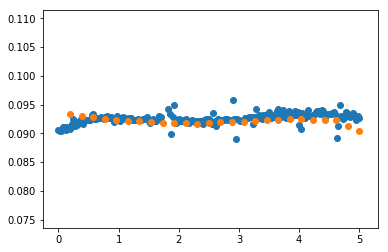

In [16]:
plt.scatter(Bu, deru)
plt.scatter(Bd, derd)